In [141]:
#dependecies 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats


In [119]:
data_df = pd.read_csv("Resources/DataScience_salaries_2024.csv")
data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [120]:
year_sort_df = data_df.sort_values('work_year')
year_sort_df.reset_index(drop = True)
cleaned_data = year_sort_df[['work_year', 'experience_level', 'employment_type','job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']]
cleaned_renamed = cleaned_data.rename(columns = {"work_year":"Working Year", "experience_level":"Experience Level",
                                    "employment_type":"Employment Type", "job_title":"Job Title",
                                    "salary_in_usd":"Salary (USD)", "employee_residence":"Employee Residence (Country)",
                                    "remote_ratio":"Remote Work Ratio", "company_location":"Location of Company (Country)",
                                   "company_size":"Size of Company"})
cleaned_renamed.reset_index(drop = True)

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
0,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
1,2020,MI,FT,Business Data Analyst,95000,US,0,US,M
2,2020,EN,FT,Data Analyst,91000,US,100,US,L
3,2020,MI,FT,Data Engineer,112872,GB,50,GB,L
4,2020,EX,FT,Managing Director Data Science,300000,US,100,US,L
...,...,...,...,...,...,...,...,...,...
14833,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
14834,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
14835,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
14836,2024,MI,FT,Data Engineer,210100,US,0,US,M


In [121]:
# Determine the number of counts per Job Title
counts_job_titles = cleaned_renamed["Job Title"].value_counts()

In [122]:
# Print the counts per Job Title
counts_job_titles

Job Title
Data Engineer                3162
Data Scientist               3015
Data Analyst                 2189
Machine Learning Engineer    1542
Research Scientist            475
                             ... 
Marketing Data Engineer         1
Manager Data Management         1
Data Science Tech Lead          1
Principal Data Architect        1
Big Data Developer              1
Name: count, Length: 153, dtype: int64

In [123]:
# Determine the number of counts per Job Title
counts_countries = cleaned_renamed["Location of Company (Country)"].value_counts()

In [124]:
# Print the counts per country
counts_countries

Location of Company (Country)
US    12975
GB      655
CA      392
ES      127
DE       98
      ...  
OM        1
IR        1
MU        1
HN        1
CN        1
Name: count, Length: 77, dtype: int64

In [125]:
# Make "Job Title" column the index name and keep "Job Title" column for parsing below
cleaned_renamed = cleaned_renamed.set_index("Job Title", drop = False)
cleaned_renamed

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
ML Engineer,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
Business Data Analyst,2020,MI,FT,Business Data Analyst,95000,US,0,US,M
Data Analyst,2020,EN,FT,Data Analyst,91000,US,100,US,L
Data Engineer,2020,MI,FT,Data Engineer,112872,GB,50,GB,L
Managing Director Data Science,2020,EX,FT,Managing Director Data Science,300000,US,100,US,L
...,...,...,...,...,...,...,...,...,...
Machine Learning Engineer,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
Machine Learning Engineer,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
Machine Learning Engineer,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M


In [126]:
# Subset dataset to US, entry level and top 3 Job Titles with the highest counts
subset_usa_entry = cleaned_renamed[(cleaned_renamed["Experience Level"] == "EN") & (cleaned_renamed["Location of Company (Country)"] == "US")]
subset_usa_entry = subset_usa_entry.loc[["Data Engineer","Data Scientist", "Data Analyst"], :]

In [127]:
# Preview subset dataset
subset_usa_entry.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
Data Engineer,2021,EN,FT,Data Engineer,72500,US,100,US,L
Data Engineer,2021,EN,FT,Data Engineer,80000,US,100,US,L
Data Engineer,2022,EN,FT,Data Engineer,120000,US,100,US,M
Data Engineer,2022,EN,FT,Data Engineer,80000,US,100,US,L
Data Engineer,2022,EN,FT,Data Engineer,129000,US,100,US,L


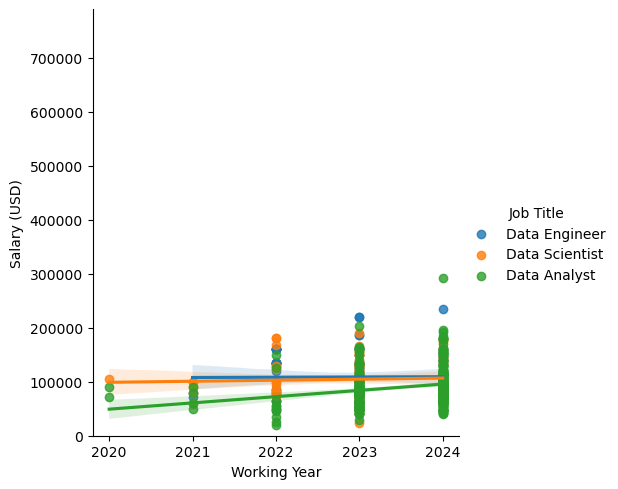

In [128]:
plot_entry = sns.lmplot(x = "Working Year", y = "Salary (USD)",
           hue = "Job Title", data = subset_usa_entry)
plot_entry.set(ylim=(0, 790000))

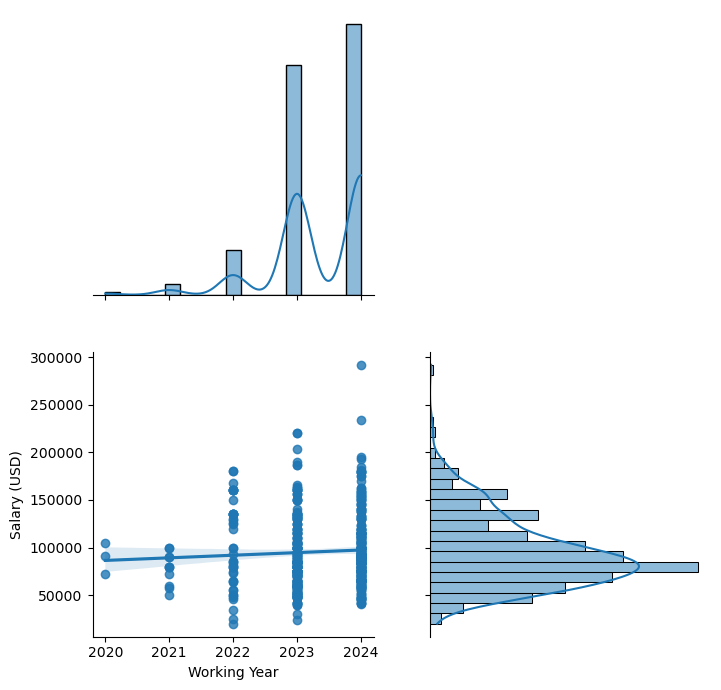

In [169]:
# Create joint plot for entry level positions in the US
joint_plot_entry = sns.jointplot(x = "Working Year", y = "Salary (USD)", data = subset_usa_entry, kind = "reg", height = 7, ratio = 1)

In [83]:
# Subset dataset to US, middle level and top 3 Job Titles with the highest counts
subset_usa_middle = cleaned_renamed[(cleaned_renamed["Experience Level"] == "MI") & (cleaned_renamed["Location of Company (Country)"] == "US")]
subset_usa = subset_usa_middle.loc[["Data Engineer","Data Scientist", "Data Analyst"], :]

In [84]:
# Preview subset dataset
subset_usa_middle.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
Data Engineer,2020,MI,FT,Data Engineer,130800,ES,100,US,M
Data Engineer,2020,MI,FT,Data Engineer,110000,US,100,US,L
Data Engineer,2020,MI,FT,Data Engineer,106000,US,100,US,L
Data Engineer,2021,MI,FT,Data Engineer,140000,US,100,US,L
Data Engineer,2021,MI,FT,Data Engineer,111775,US,0,US,M


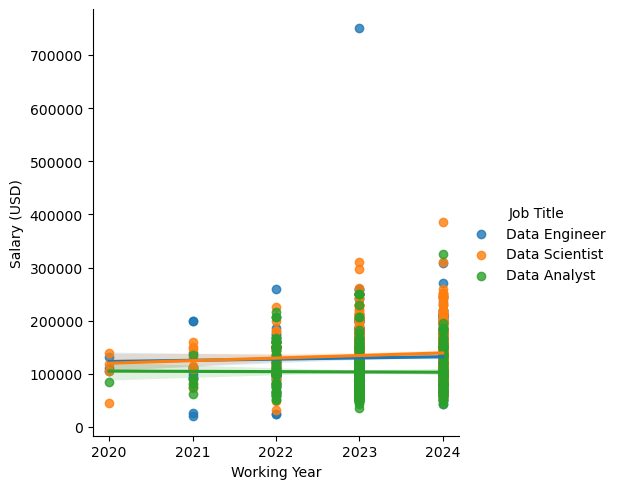

In [85]:
sns.lmplot(x = "Working Year", y = "Salary (USD)",
           hue = "Job Title", data = subset_usa_middle)

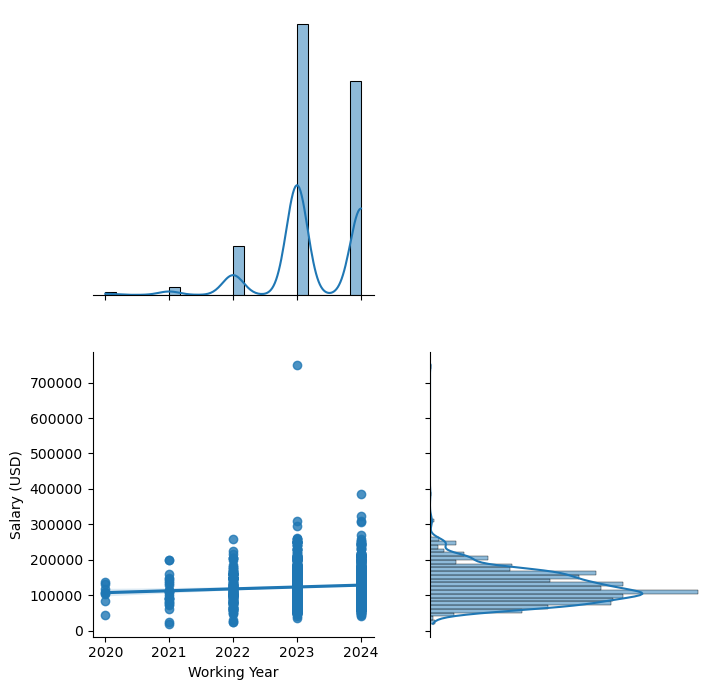

In [170]:
# Create joint plot for middle level positions in the US
joint_plot_middle = sns.jointplot(x = "Working Year", y = "Salary (USD)", data = subset_usa_middle, kind = "reg", height = 7, ratio = 1)

In [98]:
# Subset dataset to US, senior level and top 3 Job Titles with the highest counts
subset_usa_senior = cleaned_renamed[(cleaned_renamed["Experience Level"] == "SE") & (cleaned_renamed["Location of Company (Country)"] == "US")]
subset_usa_senior= subset_usa_senior.loc[["Data Engineer","Data Scientist", "Data Analyst"], :]

In [99]:
# Preview subset dataset
subset_usa_senior.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
Data Engineer,2020,SE,FT,Data Engineer,188000,US,100,US,L
Data Engineer,2021,SE,FT,Data Engineer,150000,US,100,US,L
Data Engineer,2021,SE,FT,Data Engineer,150000,US,100,US,M
Data Engineer,2021,SE,FT,Data Engineer,150000,US,0,US,L
Data Engineer,2021,SE,FT,Data Engineer,153000,US,100,US,L


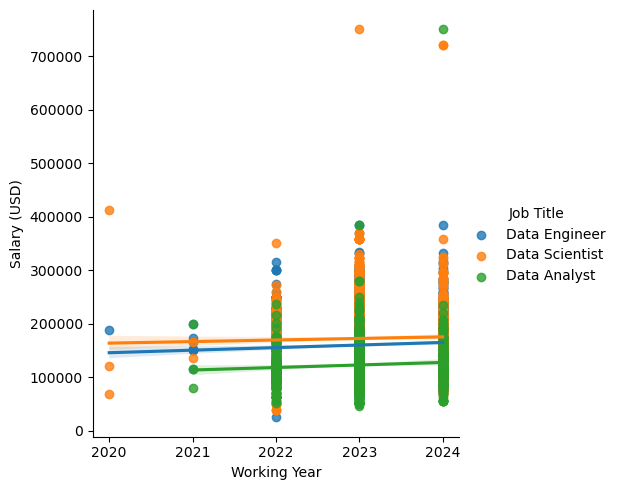

In [100]:
sns.lmplot(x = "Working Year", y = "Salary (USD)",
           hue = "Job Title", data = subset_usa_senior)

In [101]:
# Subset dataset to US and top 3 Job Titles with the highest counts
subset_usa = cleaned_renamed[(cleaned_renamed["Location of Company (Country)"] == "US")]
subset_usa = subset_usa.loc[["Data Engineer","Data Scientist", "Data Analyst"], :]

subset_usa.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
Data Engineer,2020,SE,FT,Data Engineer,188000,US,100,US,L
Data Engineer,2020,MI,FT,Data Engineer,130800,ES,100,US,M
Data Engineer,2020,MI,FT,Data Engineer,110000,US,100,US,L
Data Engineer,2020,MI,FT,Data Engineer,106000,US,100,US,L
Data Engineer,2021,MI,FT,Data Engineer,140000,US,100,US,L


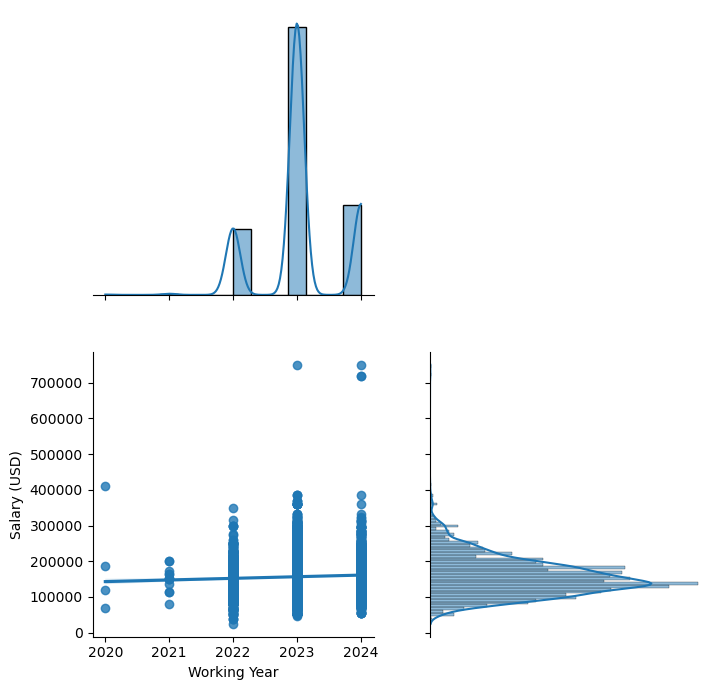

In [171]:
# Create joint plot for senior level positions in the US
joint_plot_senior = sns.jointplot(x = "Working Year", y = "Salary (USD)", data = subset_usa_senior, kind = "reg", height = 7, ratio = 1)